In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df_train = pd.read_csv('../data/processed/train.csv')
df_test = pd.read_csv('../data/processed/test.csv')

In [4]:
with open('top_features.txt', 'r') as f:
    top_features = [line.strip() for line in f.readlines()]

In [36]:
drop_selected = ["subject", "Activity", "ActivityName"]
x_train = df_train.drop(columns = drop_selected)
x_train = x_train[top_features]

x_test = df_test.drop(columns = drop_selected)
x_test = x_test[top_features]

y_train = df_train["Activity"]
y_test = df_test["Activity"]

print(f"This is x_train shape {x_train.shape}")
print(f"This is x_test shape {x_test.shape}")
print(f"This is y_train shape {y_train.shape}")
print(f"This is y_test shape {y_test.shape}")

This is x_train shape (7352, 100)
This is x_test shape (2947, 100)
This is y_train shape (7352,)
This is y_test shape (2947,)


In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [40]:
logreg = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 5000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver':['lfbgs', 'newton-cg'],
    'max_iter': [2000, 5000]
}

grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

In [41]:
grid_search.fit(x_train_scaled, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters:  {'C': 0.1, 'max_iter': 2000, 'solver': 'newton-cg'}


/Users/suryatejponnapalli/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/suryatejponnapalli/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/suryatejponnapalli/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/suryatejponnapalli/.pyenv/versions/3.11.9/lib/python3.11/site-pack

In [42]:
best_logreg = grid_search.best_estimator_

In [43]:
y_pred = best_logreg.predict(x_test_scaled)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.96      0.95       496
           2       0.93      0.93      0.93       471
           3       0.94      0.93      0.93       420
           4       0.88      0.87      0.87       491
           5       0.85      0.89      0.87       532
           6       1.00      0.96      0.98       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



In [46]:
accuracy = best_logreg.score(x_test_scaled, y_test)
print(accuracy)

0.9236511706820495


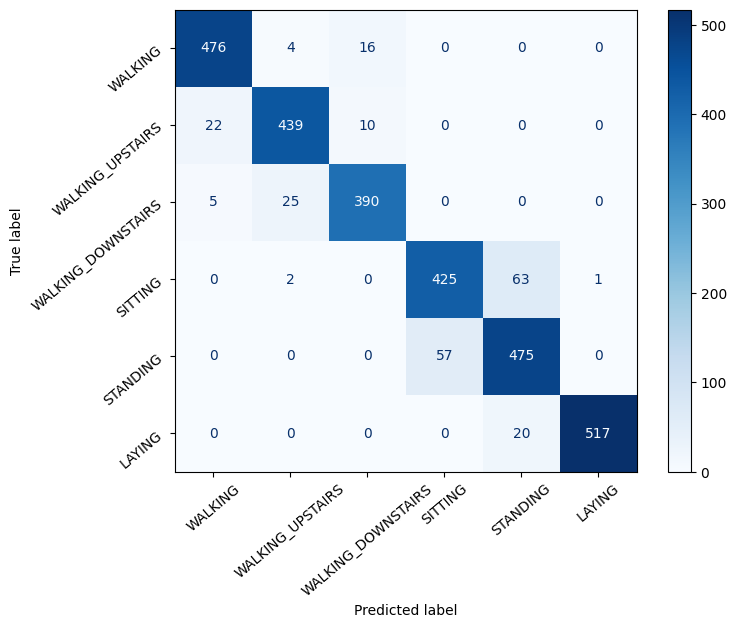

In [56]:
cm = confusion_matrix(y_test, y_pred)
class_labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax)

for tick in ax.get_xticklabels():
    tick.set_rotation(40)
for tick in ax.get_yticklabels():
    tick.set_rotation(40)

plt.show()